<a href="https://colab.research.google.com/github/gmdeorozco/Probability-Distribution-Problems-Python-Solutions-/blob/main/Mean_Median_Variance_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE DATA

Throwing a Coin 10 times x 1000

In [43]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

coin_throws = dict()
for throw in range(10000):
  for heads in range(10):
    result = random.randint(0,1)
    if result == 1:
      result = 'heads'
    else:
      result = 'tails'
    if not 'try_'+str(throw) in coin_throws:
      coin_throws['try_'+str(throw)] = [result]
      continue
    coin_throws['try_'+str(throw)].append(result)

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame.from_dict(coin_throws, orient='index', columns=[f'coin_{i+1}' for i in range(10)])
# Display the DataFrame
#df = df.transpose()
print(df)
df=df.transpose()
# Count the occurrences of each heads count across all throws
heads_counts = df.apply(lambda y: y.value_counts().get('heads', 0))
print( heads_counts)



         coin_1 coin_2 coin_3 coin_4 coin_5 coin_6 coin_7 coin_8 coin_9  \
try_0     tails  tails  heads  tails  heads  heads  heads  tails  tails   
try_1     tails  heads  heads  tails  tails  heads  tails  tails  heads   
try_2     tails  heads  tails  heads  heads  heads  tails  tails  tails   
try_3     heads  heads  heads  tails  heads  heads  tails  heads  tails   
try_4     heads  tails  tails  heads  tails  tails  heads  tails  tails   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
try_9995  heads  tails  tails  tails  tails  heads  tails  heads  tails   
try_9996  heads  tails  tails  tails  tails  tails  heads  heads  tails   
try_9997  heads  tails  heads  tails  heads  heads  tails  heads  heads   
try_9998  heads  heads  heads  heads  tails  heads  tails  heads  heads   
try_9999  tails  tails  tails  heads  tails  tails  heads  tails  heads   

         coin_10  
try_0      tails  
try_1      tails  
try_2      heads  
try_3      heads  
try_

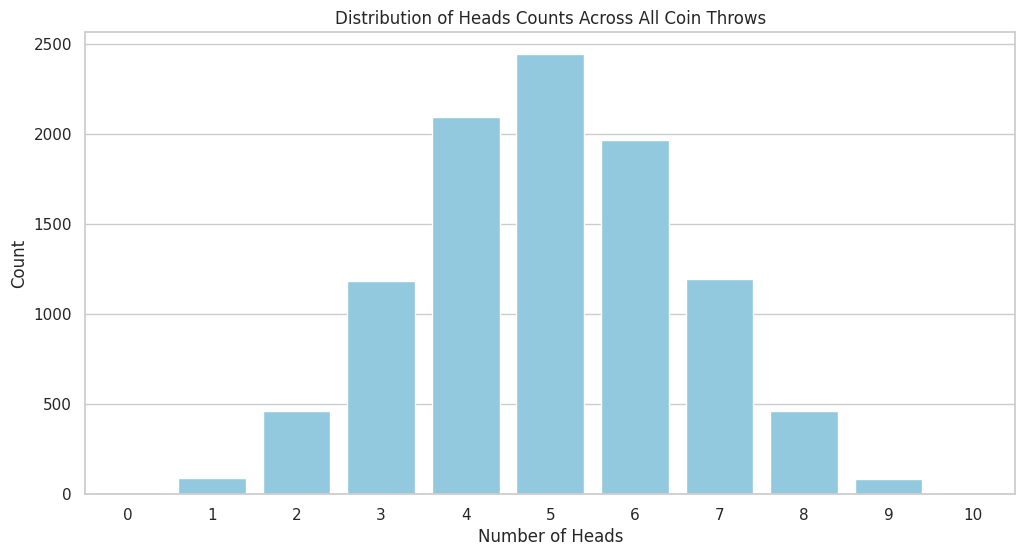

In [44]:
# Plot the column chart using Seaborn
dict_heads = dict()

for n in heads_counts:
  if n in dict_heads:
    dict_heads[n] += 1
  else:
    dict_heads[n] = 1

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=list(dict_heads.keys()), y=list(dict_heads.values()), color='skyblue')

# Add labels and title
plt.xlabel('Number of Heads')
plt.ylabel('Count')
plt.title('Distribution of Heads Counts Across All Coin Throws')

# Show the plot
plt.show()

#MEAN, MEDIAN, MODE, VARIANCE, STANDARD DEVIATION ETC.

In [ ]:
import numpy as np
dataset = np.array([1,4,6,5])
print(dataset)


[1 4 6 5]


## 1. Mean

In [ ]:
def get_mean(data):
  return sum(data)/len(data)

mean = get_mean(dataset)
print(f'Mean of dataset is {mean}')

Mean of dataset is 4.0


## 2. Median

In [ ]:
def get_median(data):
  data = np.sort(data)
  n = len(data)
  median = data[int(n/2)]
  if n % 2 == 0:
    median = (data[int(n/2 - 1)] + data[int(n/2)])/2
  return median

data_median_1 = dataset
data_median_2 = np.array([1,5,2,4,6])

print(f'Median of data_median+2 is: {get_median(data_median_2)}')
print(f'Median of data_median+2 is: {get_median(data_median_1)}')


Median of data_median+2 is: 4
Median of data_median+2 is: 4.5


## 3.Mode

In [ ]:
#Frequency computer helper function
def get_frequency_dict(data):
  computed_freq = dict()
  for x in data:
    if x in computed_freq:
      computed_freq[x] += 1
    else:
      computed_freq[x] = 1
  return computed_freq

In [ ]:
def get_mode(data):
  computed_freq = get_frequency_dict(data)
  max_frequency = 0
  mode = set()
  for key in computed_freq:
    if computed_freq[key] > max_frequency:
      mode.clear()
      mode.add(key)
      max_frequency = computed_freq[key]
    elif computed_freq[key] == max_frequency and max_frequency > 0:
      mode.add(key)
  return mode
arr = [1,1,2,2,2,3,3,3,4,4,4,4,5,5,6,]
print(f'The mode for array arr is {get_mode(arr)}')

arr2 = [1,1,2,2,2,3,3,3,4,4,4,5,5,6,]
print(f'The mode for array arr2 is {get_mode(arr2)}')

The mode for array arr is {4}
The mode for array arr2 is {2, 3, 4}


## 4. Variance

In [ ]:
def get_variance(data):
  s = 0
  n = len(data)
  mean = get_mean(data)

  for x in data:
    s += (x-mean)**2

  return s/n

arr = [1,1,2,2,2,3,3,3,4,4,4,4,5,5,6,]
var_mine = get_variance(arr)
var_np = np.var(arr)

print(f'The Variance of arr is :{var_mine}')
print(f'Verification using numpy: {var_np}')


The Variance of arr is :2.062222222222222
Verification using numpy: 2.062222222222222


## 5. Standard Deviation

In [ ]:
#Sqrt Root of the Variance
def get_std(data):
  return get_variance(data) ** 0.5

print(f' Std Deviation of {arr} = {get_std(arr)}')
print(f' Verify with numpy {np.std(arr)}')

 Std Deviation of [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6] = 1.4360439485692011
 Verify with numpy 1.4360439485692011


## 6. Skewness

In [ ]:
import scipy

arr = [1,1,2,2,2,3,3,3,4,4,4,4,5,5,6,]

mean = get_mean(arr)
median = get_median(arr)
std = get_std(arr)

def get_skeweness(data):
  n = len(data)
  mean = get_mean(arr)
  std = get_std(arr)
  skewness = sum((x - mean) ** 3 for x in data) / (n * std ** 3)
  return skewness

skeweness = get_skeweness(arr)
print(skeweness)
print(scipy.stats.skew(arr))


0.06683431352493059
0.06683431352493052
